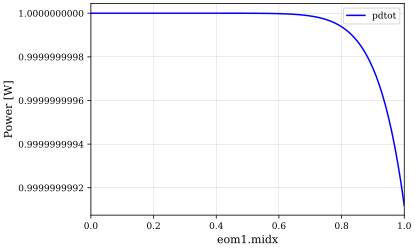

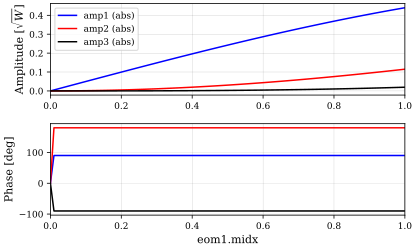

In [1]:
#Task 1: Adding sidebands to a laser
#Plot the outputs for all the amplitude detectors as the modulation depth is varied from 0 to 1
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Laser with power 1W
    laser L0 P=1
    s s0 L0.p1 eom1.p1 L=1.0

    # Phase modulator at 40kHz, with a modulation index of 0.3
    mod eom1 f=1k midx=0.3 order=5 mod_type=pm

    # Three amplitude detectors, looking at the first three positive modulation
    # sidebands
    pd pdtot eom1.p2.o
    ad amp1 eom1.p2.o f=1k
    ad amp2 eom1.p2.o f=2k
    ad amp3 eom1.p2.o f=3k
    
    # Sweep the modulation index of the modulator from 0 to 10
    xaxis( eom1.midx, lin, 0, 1, 100)
    """
)
out = kat.run()
out.plot();

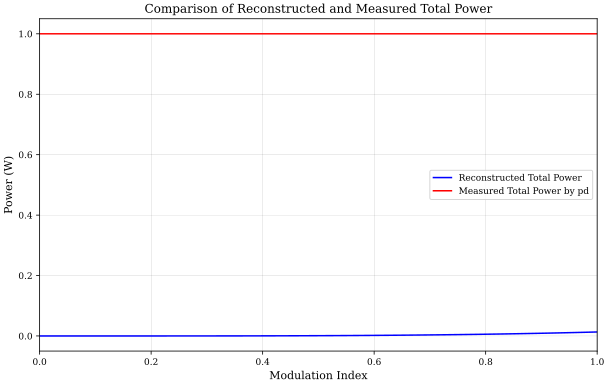

In [2]:
#Task 1: Adding sidebands to a laser
#Plot the outputs for all the amplitude detectors as the modulation depth is varied from 0 to 1
import finesse
import numpy as np
import matplotlib.pyplot as plt
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Laser with power 1W
    laser L0 P=1
    s s0 L0.p1 eom1.p1 L=1.0

    # Phase modulator at 40kHz, with a modulation index of 0.3
    mod eom1 f=1k midx=0.3 order=5 mod_type=pm

    # Three amplitude detectors, looking at the first three positive modulation
    # sidebands
    
    pd pdtot eom1.p2.o
    ad amp1 eom1.p2.o f=1k
    ad amp2 eom1.p2.o f=2k
    ad amp3 eom1.p2.o f=3k
    
    # Sweep the modulation index of the modulator from 0 to 10
    xaxis( eom1.midx, lin, 0, 1, 100)
    """
)
out = kat.run()

amp1 = np.real(out['amp1'])
amp2 = np.real(out['amp2'])
amp3 = np.real(out['amp3'])
total_power_measured = np.real(out['pdtot'])

# Reconstructing the total power from the amplitude detectors
total_power_reconstructed = amp1**2 + amp2**2 + amp3**2

# Flatten the x-axis array if needed
x_data = np.array(out.x).flatten()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_data, total_power_reconstructed, label='Reconstructed Total Power')
plt.plot(x_data, total_power_measured, label='Measured Total Power by pd')
plt.xlabel('Modulation Index')
plt.ylabel('Power (W)')
plt.title('Comparison of Reconstructed and Measured Total Power')
plt.legend()
plt.grid(True)
plt.show()


